## Data analysis and preparation

Before we can do anything with the data, we have to inspect it and make sure, that there are no defects.

In [1]:
import sys
# !conda install --yes --prefix {sys.prefix} matplotlib
# !conda install --yes --prefix {sys.prefix} missingno
# !conda install --yes --prefix {sys.prefix} pandas
# !pip install pandas-profiling
# !conda install --yes --prefix {sys.prefix} seaborn
# !conda install --yes --prefix {sys.prefix} warnings

In [2]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from pandas_profiling import ProfileReport
import seaborn as sns
sns.set_theme(style="whitegrid", palette="colorblind")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# load the data from the .txt file
file_name = 'serial_data.txt'
input_path = '../../data/interim/'+file_name
df = pd.read_csv(input_path)

In [4]:
# get data analysis by pandas profiling
# prof = ProfileReport(df)
# profile_report_name = '02_profiling_output_'+file_name+'.html'
# prof.to_file(output_file=profile_report_name)

In [5]:
# check the decoration
df.columns

Index(['partial pressure CH4 in bar', 'partial pressure CO2 in bar',
       'partial pressure H2O in bar', 'partial pressure H2 in bar',
       'inlet temperature in K', 'temperature in K', 'residence time in s',
       'portion of product in feed', 'conversion CO2'],
      dtype='object')

In [6]:
df.head(5)

,partial pressure CH4 in bar,partial pressure CO2 in bar,partial pressure H2O in bar,partial pressure H2 in bar,inlet temperature in K,temperature in K,residence time in s,portion of product in feed,conversion CO2
0,1.097830,0.315932,2.195661,1.263727,765.964,799.38477,0.13621,0.01419,0.77117
1,1.644138,0.336303,3.288275,1.345214,768.980,777.65532,0.35209,0.42543,0.62063
2,0.399854,0.145038,0.799708,0.580150,603.596,637.85452,0.15163,0.01311,0.72793
3,0.271694,0.058782,0.543387,0.235127,617.788,630.81962,0.29141,0.20416,0.74608
4,0.729877,0.105064,1.459755,0.420254,664.636,674.13566,0.31155,0.21124,0.81800


In [7]:
df_input = df.filter(items=['partial pressure CH4 in bar', 'partial pressure CO2 in bar', 'partial pressure H2O in bar',
                            'partial pressure H2 in bar', 'inlet temperature in K', 'temperature in K',
                            'residence time in s', 'portion of product in feed'])
df_target = df['conversion CO2']

### Explore Target Variables

In [8]:
# use describe to get a summary of the data
df_target.describe()

count    1000.000000
mean        0.509849
std         0.308221
min         0.000150
25%         0.180432
50%         0.642500
75%         0.764007
max         0.889850
Name: conversion CO2, dtype: float64

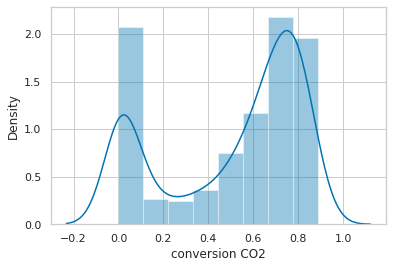

In [9]:
# histogram
sns.distplot(df_target);

<AxesSubplot:xlabel='conversion CO2'>

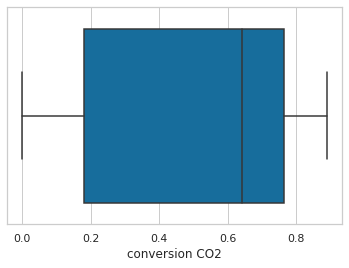

In [10]:
# boxplot
sns.boxplot(df_target)

### Explore Input Variables

In [11]:
# use describe to get a summary of the data
df_input.describe()

,partial pressure CH4 in bar,partial pressure CO2 in bar,partial pressure H2O in bar,partial pressure H2 in bar,inlet temperature in K,temperature in K,residence time in s,portion of product in feed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.101870,0.421437,2.203741,1.685747,606.415064,622.613904,0.221816,0.252441
std,0.729165,0.323498,1.458331,1.293991,116.360206,123.986941,0.104244,0.146279
min,0.005371,0.057395,0.010742,0.229581,400.228000,400.265120,0.040030,0.000080
25%,0.461398,0.206746,0.922796,0.826983,505.676000,518.803170,0.131097,0.123313
50%,0.984654,0.314408,1.969308,1.257633,610.128000,629.220560,0.231040,0.254550
75%,1.638882,0.505034,3.277764,2.020135,707.138000,728.040548,0.309152,0.381075
max,2.828288,1.797459,5.656575,7.189837,799.884000,894.194070,0.399770,0.499830


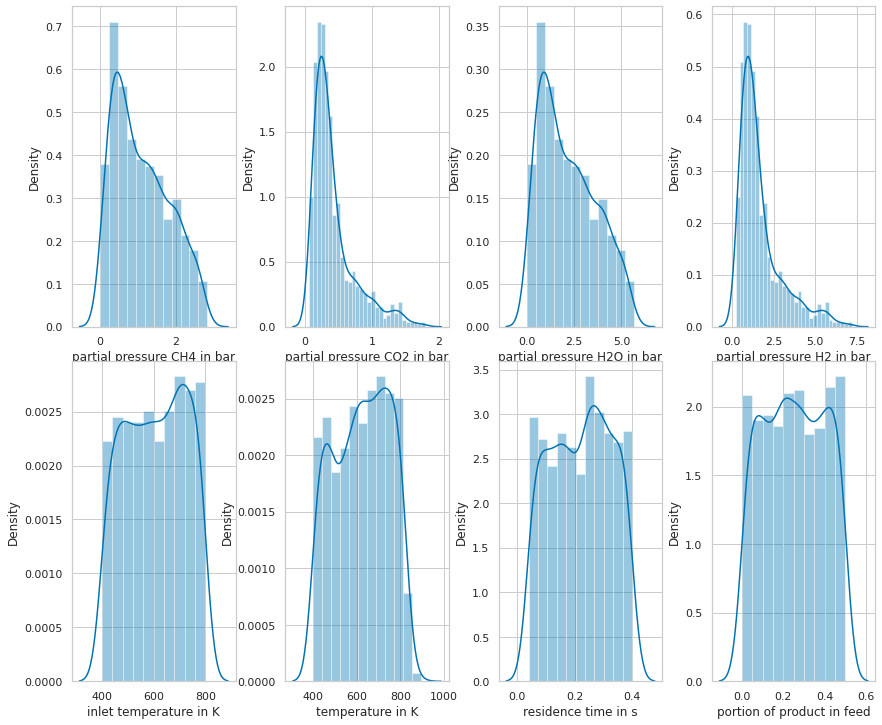

In [12]:
#histogram
fig, axs = plt.subplots(nrows=2, ncols=4,figsize=(12,10))
fig.tight_layout()
sns.distplot(df['partial pressure CH4 in bar'], ax=axs[0, 0]);
sns.distplot(df['partial pressure CO2 in bar'], ax=axs[0, 1]);
sns.distplot(df['partial pressure H2O in bar'], ax=axs[0, 2]);
sns.distplot(df['partial pressure H2 in bar'], ax=axs[0, 3]);
sns.distplot(df['inlet temperature in K'], ax=axs[1, 0]);
sns.distplot(df['temperature in K'], ax=axs[1, 1]);
sns.distplot(df['residence time in s'], ax=axs[1, 2]);
sns.distplot(df['portion of product in feed'], ax=axs[1, 3]);

### Exploring Target-Input Relationships

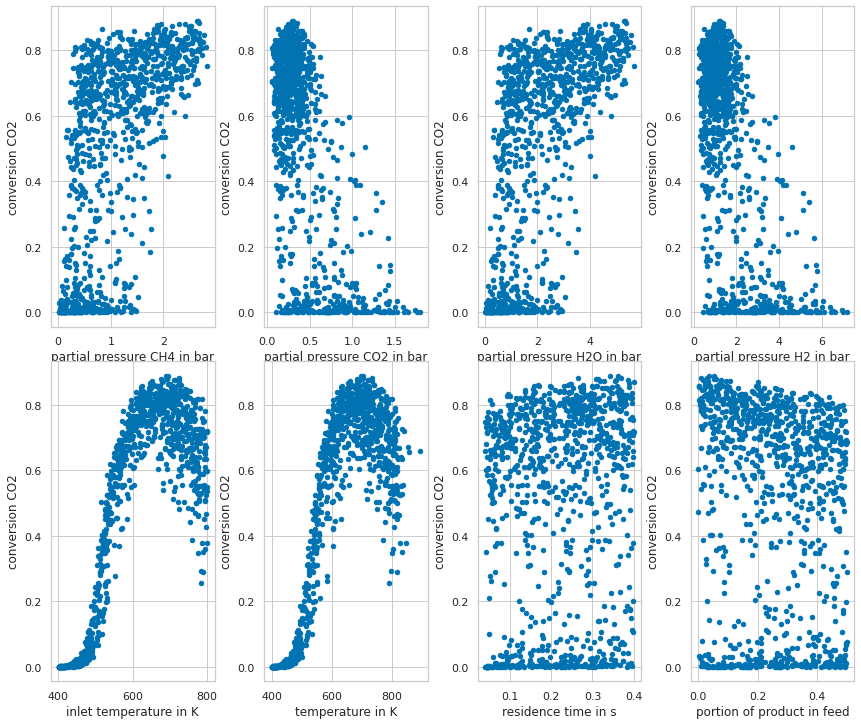

In [13]:
matplotlib_axes_logger.setLevel('ERROR')
#scatter plot pressure/ mass fraction CO2
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 10))
fig.tight_layout()
y_text = 'conversion CO2'
# CH4 inlet partial pressure
var_pCH4 = 'partial pressure CH4 in bar'
data = pd.concat([df_target, df[var_pCH4]], axis=1)
data.plot.scatter(x=var_pCH4, y=y_text, ax=axs[0, 0]);
# CO2 inlet partial pressure
var_pCO2 = 'partial pressure CO2 in bar'
data = pd.concat([df_target, df[var_pCO2]], axis=1)
data.plot.scatter(x=var_pCO2, y=y_text, ax=axs[0, 1]);
# H2O inlet partial pressure
var_pH2O = 'partial pressure H2O in bar'
data = pd.concat([df_target, df[var_pH2O]], axis=1)
data.plot.scatter(x=var_pH2O, y=y_text, ax=axs[0, 2]);
# H2 inlet partial pressuren
var_pH2 = 'partial pressure H2 in bar'
data = pd.concat([df_target, df[var_pH2]], axis=1)
data.plot.scatter(x=var_pH2, y=y_text, ax=axs[0, 3]);
# Inlet Temperature
var_T_in = 'inlet temperature in K'
data = pd.concat([df_target, df[var_T_in]], axis=1)
data.plot.scatter(x=var_T_in, y=y_text, ax=axs[1, 0]);
# Temperature
var_T = 'temperature in K'
data = pd.concat([df_target, df[var_T]], axis=1)
data.plot.scatter(x=var_T, y=y_text, ax=axs[1, 1]);
# Residence Time
var_t = 'residence time in s'
data = pd.concat([df_target, df[var_t]], axis=1)
data.plot.scatter(x=var_t, y=y_text, ax=axs[1, 2]);
# Product in Feed
var_product = 'portion of product in feed'
data = pd.concat([df_target, df[var_product]], axis=1)
data.plot.scatter(x=var_product, y=y_text, ax=axs[1, 3]);

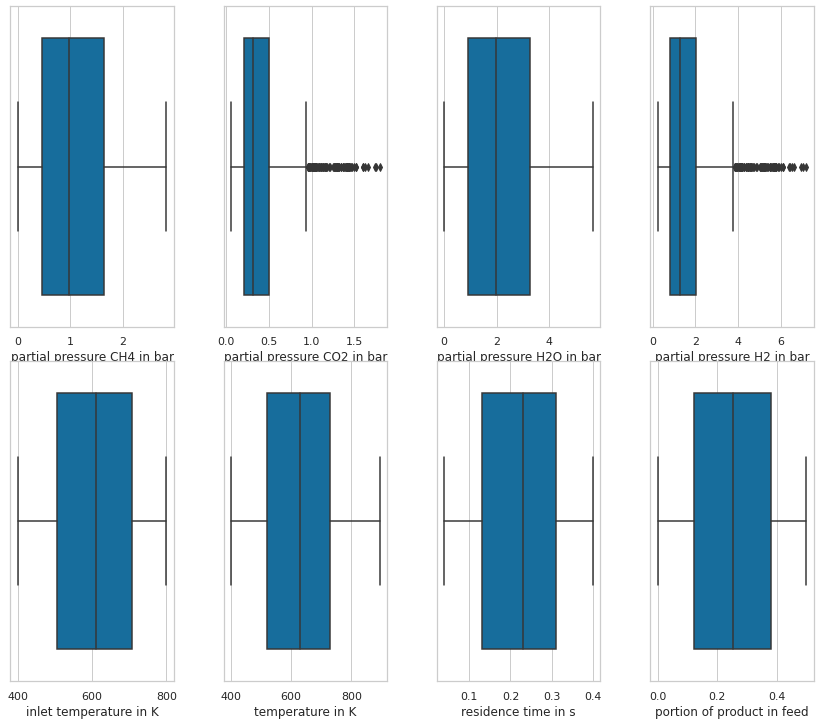

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 10))
fig.tight_layout()
sns.boxplot(df['partial pressure CH4 in bar'], ax=axs[0, 0]);
sns.boxplot(df['partial pressure CO2 in bar'], ax=axs[0, 1]);
sns.boxplot(df['partial pressure H2O in bar'], ax=axs[0, 2]);
sns.boxplot(df['partial pressure H2 in bar'], ax=axs[0, 3]);
sns.boxplot(df['inlet temperature in K'], ax=axs[1, 0]);
sns.boxplot(df['temperature in K'], ax=axs[1, 1]);
sns.boxplot(df['residence time in s'], ax=axs[1, 2]);
sns.boxplot(df['portion of product in feed'], ax=axs[1, 3]);

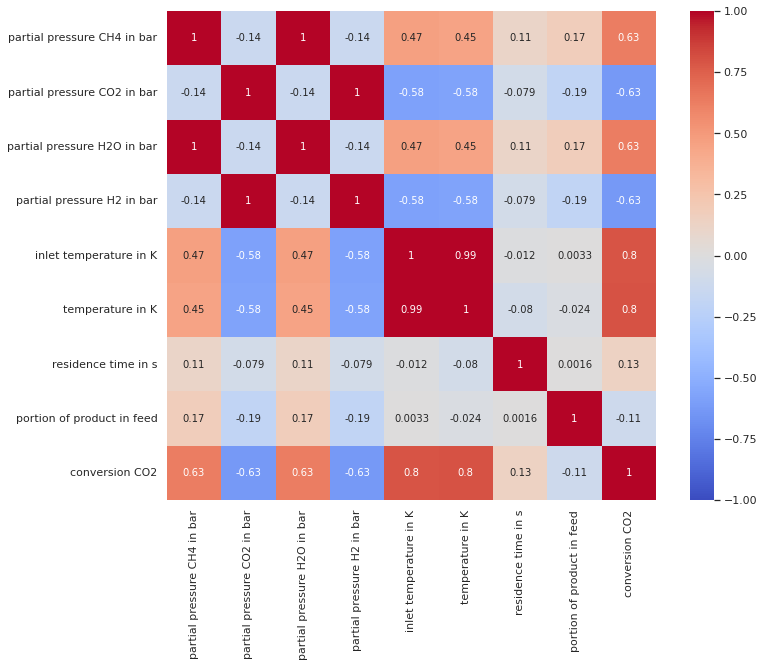

In [15]:
# correlation matrix 
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cbar=True, annot=True, vmin=-1, vmax=1, square=True, cmap='coolwarm');